# Trees & Random Forests

In [1]:
import numpy as np # For numeric operation
import pandas as pd # For Tabular information
import matplotlib.pyplot as plt # For draw plots
%matplotlib inline
import sklearn as sk # For Machine Learnig Algorithms
import kaggle # For download dataset with api
import missingno as msno # Tools for missing values

print(f'numpy v.{np.__version__}\npandas v.{pd.__version__}\nsklearn v.{sk.__version__}\nmissingno v.{msno.__version__}')


numpy v.1.18.1
pandas v.1.0.1
sklearn v.0.22.1
missingno v.0.4.2


## EDA

In [2]:
# Download Dataset

kaggle.api.dataset_download_cli('gpandi007/usa-housing-dataset', path='www.kaggle.com/gpandi007/usa-housing-dataset', unzip=True)
housing_test = pd.read_csv(r".\www.kaggle.com\gpandi007\usa-housing-dataset\housing_test.csv")

housing_train = pd.read_csv(r".\www.kaggle.com\gpandi007\usa-housing-dataset\housing_train.csv")
thread = kaggle.api.datasets_view('gpandi007','usa-housing-dataset',async_req=True)
result = thread.get()
result

  0%|          | 0.00/179k [00:00<?, ?B/s]

100%|██████████| 179k/179k [00:00<00:00, 585kB/s]


{'id': 8855,
 'ref': 'gpandi007/usa-housing-dataset',
 'subtitle': 'House Sales Price Predictions',
 'tags': [{'ref': 'business',
   'competitionCount': 1,
   'datasetCount': 8598,
   'description': 'Businesses are organizational entities that drive economic activity. Explore the inner workings of things like HR practices, product sales, and customer happiness in these competitions, kernels, and datasets.',
   'fullPath': 'society and social sciences > society > business',
   'isAutomatic': False,
   'name': 'business',
   'scriptCount': 120,
   'totalCount': 8719},
  {'ref': 'society',
   'competitionCount': 0,
   'datasetCount': 1918,
   'description': None,
   'fullPath': 'society and social sciences > society',
   'isAutomatic': False,
   'name': 'society',
   'scriptCount': 7,
   'totalCount': 1925},
  {'ref': 'finance',
   'competitionCount': 4,
   'datasetCount': 1199,
   'description': "The finance tag covers datasets and kernels about money and investing. If you need to test s

In [3]:
# Shape
print(f"""housing_test have {housing_test.shape[0]} rows by {housing_test.shape[1]} columns
housing_train have {housing_train.shape[0]} rows by {housing_train.shape[1]} columns""")

housing_test have 1459 rows by 80 columns
housing_train have 1460 rows by 81 columns


In [4]:
# Remove duplicates
housing_train = housing_train.drop_duplicates('Id')

In [5]:
# Description Number
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Description Object
housing_train.describe(include = ['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


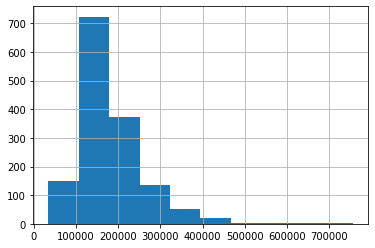

In [7]:
housing_train.SalePrice.hist()

Target have a correct gaussian distribution, whithout outliers

In [8]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Correlation

In [9]:
# Correlation number columns
corr = housing_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [10]:
# Features and target
X = housing_train.drop(['SalePrice'], axis=1)
y = housing_train['SalePrice']

print(f"""X shape {X.shape}
y shape {y.shape}""")

X shape (1460, 80)
y shape (1460,)


In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
print(f"""X_train shape {X_train.shape}
y_train shape {y_train.shape}
X_test shape {X_test.shape}
y_test shape {y_test.shape}""")

X_train shape (1168, 80)
y_train shape (1168,)
X_test shape (292, 80)
y_test shape (292,)


## Handling Data

In [13]:
X_train.notnull().apply(pd.Series.value_counts)
# When False have a number is for this column have nulls, like LotFrontage have 259 nulls

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
False,NaN,NaN,NaN,209,NaN,NaN,1097,NaN,NaN,NaN,...,NaN,NaN,1163,954,1124,NaN,NaN,NaN,NaN,NaN
True,1168.0,1168.0,1168.0,959,1168.0,1168.0,71,1168.0,1168.0,1168.0,...,1168.0,1168.0,5,214,44,1168.0,1168.0,1168.0,1168.0,1168.0


In [14]:
 X_train.isnull().any().value_counts()

False    61
True     19
dtype: int64

We have 61 features without nulls and 19 with nulls

In [15]:
columns_with_nulls = [i for i,j in dict(X_train.isnull().any()).items()
                      if j == True]
print(*[(i,j) for i,j in enumerate(columns_with_nulls,1)], sep="\n")

(1, 'LotFrontage')
(2, 'Alley')
(3, 'MasVnrType')
(4, 'MasVnrArea')
(5, 'BsmtQual')
(6, 'BsmtCond')
(7, 'BsmtExposure')
(8, 'BsmtFinType1')
(9, 'BsmtFinType2')
(10, 'Electrical')
(11, 'FireplaceQu')
(12, 'GarageType')
(13, 'GarageYrBlt')
(14, 'GarageFinish')
(15, 'GarageQual')
(16, 'GarageCond')
(17, 'PoolQC')
(18, 'Fence')
(19, 'MiscFeature')


In [16]:
X_train[columns_with_nulls].notnull().apply(pd.Series.value_counts)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
False,209,1097,8,8,30,30,31,30,31,1,548,61,61,61,61,61,1163,954,1124
True,959,71,1160,1160,1138,1138,1137,1138,1137,1167,620,1107,1107,1107,1107,1107,5,214,44


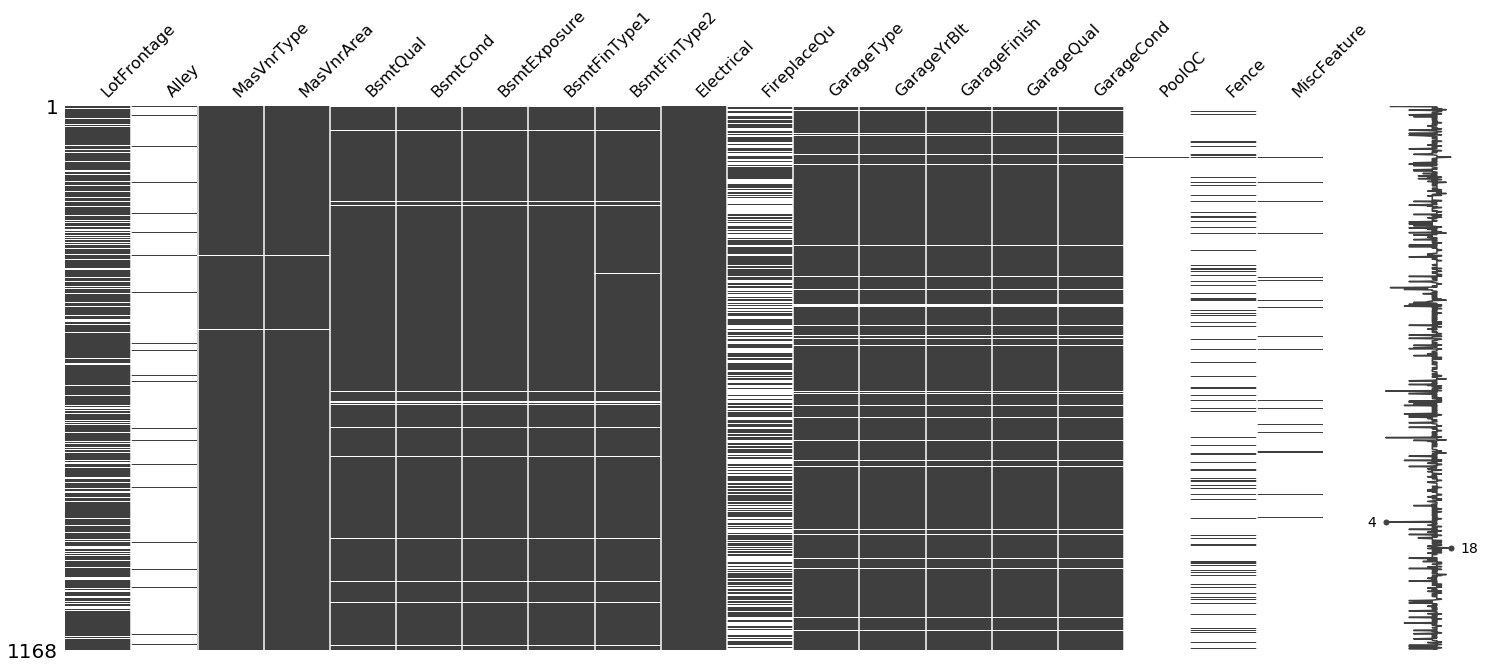

In [17]:
msno.matrix(X_train[columns_with_nulls]);

In [18]:
X_train[columns_with_nulls].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
921,67.0,NaN,None,0.0,TA,TA,No,ALQ,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GdPrv,NaN
520,60.0,Grvl,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,65.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2005.0,Fin,TA,TA,NaN,NaN,NaN
280,82.0,NaN,BrkFace,340.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,1989.0,Fin,TA,TA,NaN,NaN,NaN
1401,62.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,2004.0,Fin,TA,TA,NaN,NaN,NaN


### Data fields
1. **LotFrontage**: Linear feet of street connected to property

1. **Alley**: Type of alley access

1. **MasVnrType**: Masonry veneer type

1. **MasVnrArea**: Masonry veneer area in square feet

1. **BsmtQual**: Height of the basement

1. **BsmtCond**: General condition of the basement

1. **BsmtExposure**: Walkout or garden level basement walls

1. **BsmtFinType1**: Quality of basement finished area

1. **BsmtFinType2**: Quality of second finished area (if present)

1. **Electrical**: Electrical system

1. **FireplaceQu**: Fireplace quality

1. **GarageType**: Garage location

1. **GarageYrBlt**: Year garage was built

1. **GarageFinish**: Interior finish of the garage

1. **GarageQual**: Garage quality

1. **GarageCond**: Garage condition

1. **PoolQC**: Pool quality

1. **Fence**: Fence quality

1. **MiscFeature**: Miscellaneous feature not covered in other categories

In [19]:
X_train[columns_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 921 to 1061
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   959 non-null    float64
 1   Alley         71 non-null     object 
 2   MasVnrType    1160 non-null   object 
 3   MasVnrArea    1160 non-null   float64
 4   BsmtQual      1138 non-null   object 
 5   BsmtCond      1138 non-null   object 
 6   BsmtExposure  1137 non-null   object 
 7   BsmtFinType1  1138 non-null   object 
 8   BsmtFinType2  1137 non-null   object 
 9   Electrical    1167 non-null   object 
 10  FireplaceQu   620 non-null    object 
 11  GarageType    1107 non-null   object 
 12  GarageYrBlt   1107 non-null   float64
 13  GarageFinish  1107 non-null   object 
 14  GarageQual    1107 non-null   object 
 15  GarageCond    1107 non-null   object 
 16  PoolQC        5 non-null      object 
 17  Fence         214 non-null    object 
 18  MiscFeature   44 non-null 

In [20]:
from sklearn.impute import SimpleImputer 
catimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # for categoric features
numimp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [21]:
# Choices features with the majority values by object type
list_for_imp_cat = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
# List for drop by object type
list_for_drop_cat = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
# List of features with majority values by float type
list_for_imp_float = ['LotFrontage','MasVnrArea','GarageYrBlt']

In [22]:
X_train = X_train.copy()

In [23]:
X_train[list_for_imp_cat] = catimp.fit_transform(X_train[list_for_imp_cat])

In [24]:
X_train[list_for_imp_float] = numimp.fit_transform(X_train[list_for_imp_float])

In [25]:
X_train[columns_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 921 to 1061
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1168 non-null   float64
 1   Alley         71 non-null     object 
 2   MasVnrType    1168 non-null   object 
 3   MasVnrArea    1168 non-null   float64
 4   BsmtQual      1168 non-null   object 
 5   BsmtCond      1168 non-null   object 
 6   BsmtExposure  1168 non-null   object 
 7   BsmtFinType1  1168 non-null   object 
 8   BsmtFinType2  1168 non-null   object 
 9   Electrical    1168 non-null   object 
 10  FireplaceQu   620 non-null    object 
 11  GarageType    1168 non-null   object 
 12  GarageYrBlt   1168 non-null   float64
 13  GarageFinish  1168 non-null   object 
 14  GarageQual    1168 non-null   object 
 15  GarageCond    1168 non-null   object 
 16  PoolQC        5 non-null      object 
 17  Fence         214 non-null    object 
 18  MiscFeature   44 non-null 

In [26]:
print(X_train.shape)
# Drop columns with insignificative values
X_train = X_train.drop(columns=list_for_drop_cat, axis=1)
print(X_train.shape)

(1168, 80)
(1168, 75)


In [27]:
list_cat = [i for i in X_train if X_train[i].dtypes == 'object']
list_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [28]:
X_train[list_cat] = X_train[list_cat].astype('category')

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 921 to 1061
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1168 non-null   int64   
 1   MSSubClass     1168 non-null   int64   
 2   MSZoning       1168 non-null   category
 3   LotFrontage    1168 non-null   float64 
 4   LotArea        1168 non-null   int64   
 5   Street         1168 non-null   category
 6   LotShape       1168 non-null   category
 7   LandContour    1168 non-null   category
 8   Utilities      1168 non-null   category
 9   LotConfig      1168 non-null   category
 10  LandSlope      1168 non-null   category
 11  Neighborhood   1168 non-null   category
 12  Condition1     1168 non-null   category
 13  Condition2     1168 non-null   category
 14  BldgType       1168 non-null   category
 15  HouseStyle     1168 non-null   category
 16  OverallQual    1168 non-null   int64   
 17  OverallCond    1168 non-null   

In [30]:
X_train = pd.get_dummies(X_train, columns=list_cat)
X_train.shape

(1168, 268)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 921 to 1061
Columns: 268 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(231)
memory usage: 610.2 KB


Best features for models

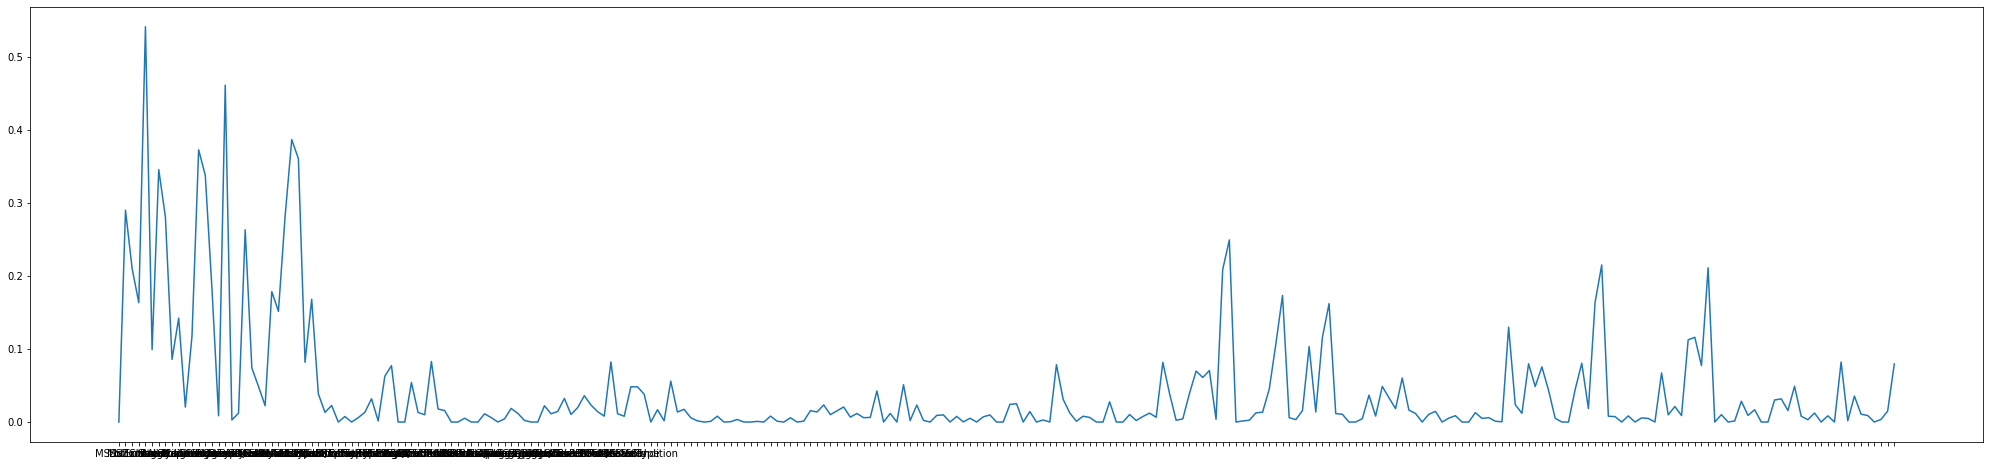

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X_train,y_train)
scores = selector.scores_


plt.rcParams["figure.figsize"] = [35,8]
plt.plot(scores)
plt.xticks(np.arange(268),list(X.columns));

In [33]:
best_cols = [X_train.columns[i] for i,j in enumerate(scores) if j > 0.3]
best_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

### Regression Tree

In [59]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5)}
regressor1 = GridSearchCV(tree.DecisionTreeRegressor(criterion='mse', random_state=202), 
                          parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
regressor1.fit(X=X_train, y=y_train)
tree_model1 = regressor1.best_estimator_
print('Best regressorTree1 ', regressor1.best_score_, regressor1.best_params_) 

Fitting 5 folds for each of 68 candidates, totalling 340 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.3s


Best regressorTree1  0.7052233176792398 {'max_depth': 5, 'min_samples_leaf': 4}


[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    2.4s finished


In [35]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5)}
regressor2 = GridSearchCV(tree.DecisionTreeRegressor(criterion='mse', random_state=202), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
regressor2.fit(X=X_train[best_cols], y=y_train)
tree_model2 = regressor2.best_estimator_
print('Best regressorTree2 ', regressor2.best_score_, regressor2.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 68 candidates, totalling 340 fits
Best regressorTree2  0.7656232851421947 {'max_depth': 7, 'min_samples_leaf': 4}


[Parallel(n_jobs=4)]: Done 238 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    0.5s finished


### Regression RF

In [36]:
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)

In [37]:
# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
regressorRF1 = GridSearchCV(RandomForestRegressor(criterion='mse', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
regressorRF1.fit(X=X_train, y=y_train)
RF_model1 = regressorRF1.best_estimator_
print('Best regressorRF ', regressorRF1.best_score_, regressorRF1.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 1020 out of 1020 | elapsed: 11.2min finished


Best regressorRF  0.8442653776583091 {'max_depth': 18, 'min_samples_leaf': 1, 'n_estimators': 400}


In [38]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
regressorRF2 = GridSearchCV(RandomForestRegressor(criterion='mse', random_state=202), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
regressorRF2.fit(X=X_train[best_cols], y=y_train)
RF_model2 = regressorRF2.best_estimator_
print('Best regressorRF2 ', regressorRF2.best_score_, regressorRF2.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 1020 out of 1020 | elapsed:  3.0min finished


Best regressorRF2  0.8215085541352225 {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 150}


### Classifier Tree

In [39]:
# Train with all features
parameters = {'max_depth':range(3,20)}
classifier1 = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini', random_state=202, min_samples_split=1), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
classifier1.fit(X=X_train, y=y_train)
treeclass_model1 = classifier1.best_estimator_
print('Best classifierTree1 ', classifier1.best_score_, classifier1.best_params_)

Fitting 5 folds for each of 68 candidates, totalling 340 fits


C:\Users\Hippogryph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.6s


Best classifierTree1  0.02140420380763728 {'max_depth': 4, 'min_samples_leaf': 1}


[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:   11.4s finished


In [40]:
# Train with only best corr features
parameters = {'max_depth':range(3,20)}
classifier2 = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini', random_state=202, min_samples_split=1), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
classifier2.fit(X=X_train[best_cols], y=y_train)
treeclass_model2 = classifier2.best_estimator_
print('Best classifierTree2 ', classifier2.best_score_, classifier2.best_params_)

C:\Users\Hippogryph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 68 candidates, totalling 340 fits


[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.7s


Best classifierTree2  0.016275998679432156 {'max_depth': 7, 'min_samples_leaf': 4}


[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    3.5s finished


### Classifier RF

In [41]:
# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
classifierRF1 = GridSearchCV(RandomForestClassifier(criterion='gini', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
classifierRF1.fit(X=X_train, y=y_train)
clfRF_model1 = classifierRF1.best_estimator_
print('Best classifierRF ', classifierRF1.best_score_, classifierRF1.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


C:\Users\Hippogryph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   32.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 1020 out of 1020 | elapsed:  5.7min finished


Best classifierRF  0.026543413667877186 {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 150}


In [42]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
classifierRF2 = GridSearchCV(RandomForestClassifier(criterion='gini', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
classifierRF2.fit(X=X_train[best_cols], y=y_train)
clfRF_model2 = classifierRF2.best_estimator_
print('Best classifierRF ', classifierRF2.best_score_, classifierRF2.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


C:\Users\Hippogryph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   35.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 1020 out of 1020 | elapsed:  6.5min finished


Best classifierRF  0.023986647591797805 {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 150}


anotacion rapida: Debido a que existen valores con frecuencia de 1 en nuestra variable objetivo, no es prudente que estos valores se dividan en 5k-folds

### Comparison

__Regressor models__